# NLP with NLTK (.. and a little sklearn) 

Natural Language Processing with the Natural Language Toolkit

[nltk](http://www.nltk.org/) is a Python package for NLP.

In [1]:
#!pip install nltk textblob -U

    100% |████████████████████████████████| 1.2MB 858kB/s ta 0:00:01
    100% |████████████████████████████████| 634kB 647kB/s ta 0:00:011
Requirement already up-to-date: six in /Users/xavier/anaconda/lib/python3.6/site-packages (from nltk)
  Running setup.py bdist_wheel for nltk ... done
  Stored in directory: /Users/xavier/Library/Caches/pip/wheels/18/9c/1f/276bc3f421614062468cb1c9d695e6086d0c73d67ea363c501
Successfully built nltk
  Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4


In [1]:
from textblob import TextBlob
import nltk
import IPython # we'll use this to draw
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def nltk_disp(item):
    IPython.core.display.display(item)

Much of NLTK depends on additional data which you'll have to download. Use `nltk.download()` to get at least the following:

 * averaged_perceptron_tagger (in models)
 * maxent_treebank_pos_tagger (in models)
 * punkt (in models)
 * maxent_ne_chunk (in models)
 * words (in corpora)

You can install these and continue without restarting your kernel.

In [3]:
for dl in ["averaged_perceptron_tagger", "maxent_treebank_pos_tagger", "punkt", "maxent_ne_chunker", "words"]:
    nltk.download(dl)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/xavier/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/xavier/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/xavier/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/xavier/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/xavier/nltk_data...
[nltk_data]   Package words is already up-to-date!


### Sentence tokenization

In [5]:
from nltk.tokenize import sent_tokenize

text = """Hello. How are you, dear Mr. Sir? Are you well?
          Here: drink this! It will make you feel better.
          I mean, it won't make you feel worse!"""

sentences = sent_tokenize(text)
print(sentences)


['Hello.', 'How are you, dear Mr. Sir?', 'Are you well?', 'Here: drink this!', 'It will make you feel better.', "I mean, it won't make you feel worse!"]


### Word tokenization

In [6]:
# TreebankWordTokenizer assumes that our input has already been segmented into sentences..


from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
tokenizer.tokenize(sentences[5])

['I', 'mean', ',', 'it', 'wo', "n't", 'make', 'you', 'feel', 'worse', '!']

In [7]:
from nltk.tokenize import word_tokenize
words = word_tokenize(sentences[5])
words

['I', 'mean', ',', 'it', 'wo', "n't", 'make', 'you', 'feel', 'worse', '!']

In [8]:
from nltk.tokenize import wordpunct_tokenize
wordpunct_tokenize(sentences[5])

['I', 'mean', ',', 'it', 'won', "'", 't', 'make', 'you', 'feel', 'worse', '!']

Demo of different tokenizers: http://text-processing.com/demo/tokenize/

### Part of speech tagging

In [9]:
from nltk.tag import pos_tag
words=pos_tag(word_tokenize("Who's going to that thing today?"))
words

[('Who', 'WP'),
 ("'s", 'VBZ'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('that', 'DT'),
 ('thing', 'NN'),
 ('today', 'NN'),
 ('?', '.')]

##### Some of POS tags: 
WP: wh-pronoun ("who", "what")  
VBZ: verb, 3rd person sing. present ("takes")  
VBG: verb, gerund/present participle ("taking")  
TO: to ("to go", "to him")   
DT: determiner ("the", "this")  
NN: noun, singular or mass ("door")  
.: Punctuation (".", "?")  

All tags: http://www.monlp.com/2011/11/08/part-of-speech-tags/

### Chunking
Extracting phrases

In [10]:
## the 'named entity' chunker!  ne_chunk utilizes 

from nltk.chunk import ne_chunk
words = word_tokenize("""I'm Julia and I'm here to say
                         I love NLTK in a major way.""")
tags = pos_tag(words)
tree = ne_chunk(tags)
print(tags)
print(tree)

[('I', 'PRP'), ("'m", 'VBP'), ('Julia', 'JJ'), ('and', 'CC'), ('I', 'PRP'), ("'m", 'VBP'), ('here', 'RB'), ('to', 'TO'), ('say', 'VB'), ('I', 'PRP'), ('love', 'VBP'), ('NLTK', 'NNP'), ('in', 'IN'), ('a', 'DT'), ('major', 'JJ'), ('way', 'NN'), ('.', '.')]
(S
  I/PRP
  'm/VBP
  (PERSON Julia/JJ)
  and/CC
  I/PRP
  'm/VBP
  here/RB
  to/TO
  say/VB
  I/PRP
  love/VBP
  (ORGANIZATION NLTK/NNP)
  in/IN
  a/DT
  major/JJ
  way/NN
  ./.)


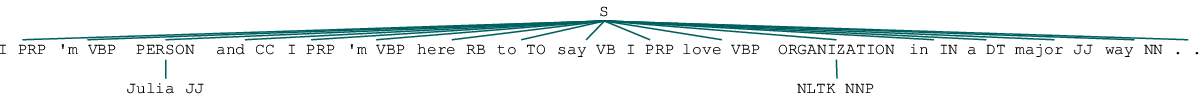

In [11]:
nltk_disp(tree)

In [12]:
words2 = word_tokenize("First National Bank announced earnings!")
tags2=pos_tag(words2)
tree2=ne_chunk(tags2)

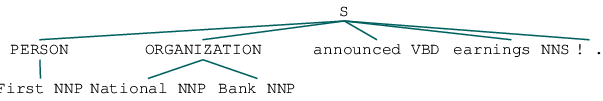

In [13]:
nltk_disp(tree2)

### Included text corpora

Also install these!

 * movie_reviews: Imdb reviews characterized as pos & neg  
 * treebank: tagged and parsed Wall Street Journal text  
 * brown: tagged & categorized English text (news, fiction, etc)  

(There are over 60 others.)

In [14]:
for dl in ["movie_reviews", "treebank", "brown", "stopwords"]:
    nltk.download(dl)

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/xavier/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package treebank to /Users/xavier/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package brown to /Users/xavier/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xavier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# A chunked corpora reader..

from nltk.corpus import treebank_chunk
treebank_chunk.tagged_sents()[0]

/Users/xavier/anaconda/lib/python3.6/site-packages/nltk/tokenize/regexp.py:123: FutureWarning: split() requires a non-empty pattern match.
  return [tok for tok in self._regexp.split(text) if tok]


[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

/Users/xavier/anaconda/lib/python3.6/site-packages/nltk/tokenize/regexp.py:123: FutureWarning: split() requires a non-empty pattern match.
  return [tok for tok in self._regexp.split(text) if tok]


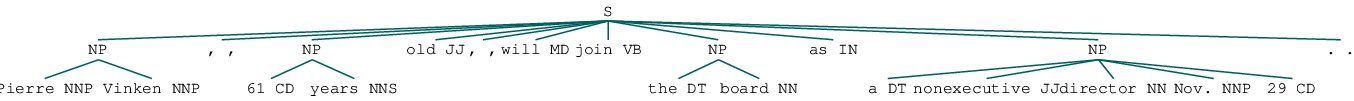

In [17]:
nltk_disp(treebank_chunk.chunked_sents()[0])

In [18]:
tree=treebank_chunk.chunked_sents()[0]
' '.join([w for w, t in tree.leaves()])

/Users/xavier/anaconda/lib/python3.6/site-packages/nltk/tokenize/regexp.py:123: FutureWarning: split() requires a non-empty pattern match.
  return [tok for tok in self._regexp.split(text) if tok]


'Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .'

# TextBlob

In [16]:
GATSBY_TEXT = """In my younger and more vulnerable years my father
                 gave me some advice that I've been turning over
                 in my mind ever since. "Whenever you feel like
                 criticizing any one," he told me, "blah blah blah."""

gatsby = TextBlob(GATSBY_TEXT)

In [17]:
gatsby.tags

[('In', 'IN'),
 ('my', 'PRP$'),
 ('younger', 'JJR'),
 ('and', 'CC'),
 ('more', 'RBR'),
 ('vulnerable', 'JJ'),
 ('years', 'NNS'),
 ('my', 'PRP$'),
 ('father', 'NN'),
 ('gave', 'VBD'),
 ('me', 'PRP'),
 ('some', 'DT'),
 ('advice', 'NN'),
 ('that', 'IN'),
 ('I', 'PRP'),
 ("'ve", 'VBP'),
 ('been', 'VBN'),
 ('turning', 'VBG'),
 ('over', 'IN'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('mind', 'NN'),
 ('ever', 'RB'),
 ('since', 'IN'),
 ('Whenever', 'IN'),
 ('you', 'PRP'),
 ('feel', 'VBP'),
 ('like', 'IN'),
 ('criticizing', 'VBG'),
 ('any', 'DT'),
 ('one', 'CD'),
 ('he', 'PRP'),
 ('told', 'VBD'),
 ('me', 'PRP'),
 ('blah', 'NN'),
 ('blah', 'NN'),
 ('blah', 'NN')]

In [18]:
gatsby.noun_phrases

WordList(['vulnerable years', 'whenever', 'blah blah blah'])

###  How do you really feel?    TextBlob:  Sentiment Analysis

In [19]:
TextBlob("Oh my god I love this bootcamp, it's so awesome.").sentiment

Sentiment(polarity=0.75, subjectivity=0.8)

In [20]:
TextBlob("it's so awesome").sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [21]:
TextBlob("Oh my god.").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [22]:
TextBlob("I love this bootcamp.").sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [23]:
TextBlob("Oh my god I love this bootcamp.").sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [24]:
TextBlob("it's so awesome.").sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [25]:
print(TextBlob("I hate cupcakes.").sentiment)

Sentiment(polarity=-0.8, subjectivity=0.9)


In [26]:
gatsby.sentences

[Sentence("In my younger and more vulnerable years my father
                  gave me some advice that I've been turning over
                  in my mind ever since."), Sentence(""Whenever you feel like
                  criticizing any one," he told me, "blah blah blah.")]

In [27]:
gatsby.words

WordList(['In', 'my', 'younger', 'and', 'more', 'vulnerable', 'years', 'my', 'father', 'gave', 'me', 'some', 'advice', 'that', 'I', "'ve", 'been', 'turning', 'over', 'in', 'my', 'mind', 'ever', 'since', 'Whenever', 'you', 'feel', 'like', 'criticizing', 'any', 'one', 'he', 'told', 'me', 'blah', 'blah', 'blah'])

In [28]:
gatsby.sentences[0].words

WordList(['In', 'my', 'younger', 'and', 'more', 'vulnerable', 'years', 'my', 'father', 'gave', 'me', 'some', 'advice', 'that', 'I', "'ve", 'been', 'turning', 'over', 'in', 'my', 'mind', 'ever', 'since'])

#### Stemming

In [29]:
stemmer = nltk.stem.porter.PorterStemmer()
for word in TextBlob("Are you running in two marathons?").words:
    print(stemmer.stem(word))

are
you
run
in
two
marathon


To see different nltk stemmers in effect:
http://text-processing.com/demo/stem/

In [30]:
for word, count in gatsby.word_counts.items():
    print("%15s %i" % (word, count))

             in 2
             my 3
        younger 1
            and 1
           more 1
     vulnerable 1
          years 1
         father 1
           gave 1
             me 2
           some 1
         advice 1
           that 1
              i 1
             ve 1
           been 1
        turning 1
           over 1
           mind 1
           ever 1
          since 1
       whenever 1
            you 1
           feel 1
           like 1
    criticizing 1
            any 1
            one 1
             he 1
           told 1
           blah 3


In [31]:
def get_count(item):
    return item[1]

for word, count in sorted(gatsby.word_counts.items(), key=get_count, reverse=True):
    print("%15s %i" % (word, count))

             my 3
           blah 3
             in 2
             me 2
        younger 1
            and 1
           more 1
     vulnerable 1
          years 1
         father 1
           gave 1
           some 1
         advice 1
           that 1
              i 1
             ve 1
           been 1
        turning 1
           over 1
           mind 1
           ever 1
          since 1
       whenever 1
            you 1
           feel 1
           like 1
    criticizing 1
            any 1
            one 1
             he 1
           told 1


### Movie Reviews 
(without stopwords!)

In [35]:
# nltk.download()

In [32]:
import nltk
from textblob import TextBlob
from nltk.corpus import movie_reviews

fileids = movie_reviews.fileids()[:100]

doc_words = [movie_reviews.words(fileid) for fileid in fileids]
documents = [' '.join(words) for words in doc_words]
print(documents[0:1])

['plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what \' s the deal ? watch the movie and " sorta " find out . . . critique : a mind - fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn \' t snag this one correctly . they seem to have taken this pretty neat concept , but executed it terribly . so what are the problems with the movie ? well , its main problem is that it \' s simply too jumbled . it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no

In [40]:
print(documents)

['plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what \' s the deal ? watch the movie and " sorta " find out . . . critique : a mind - fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn \' t snag this one correctly . they seem to have taken this pretty neat concept , but executed it terribly . so what are the problems with the movie ? well , its main problem is that it \' s simply too jumbled . it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no

##### Top bigrams in reviews

In [41]:
from nltk.util import ngrams

from collections import Counter
from operator import itemgetter

from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"']
stop = set(stop)

counter = Counter()

n = 2
for doc in documents:
    words = TextBlob(doc).words
    words = [w for w in words if w not in stop]
    bigrams = ngrams(words, n)
    counter += Counter(bigrams)

for phrase, count in counter.most_common(30):
    print('%20s %i' % (" ".join(phrase), count))

     special effects 20
         ghosts mars 18
         first movie 14
           prinze jr 12
         monkey bone 12
         even though 11
           hong kong 11
        fight scenes 11
            want see 10
           van damme 10
         jackie chan 10
         every scene 10
         movies like 9
          romeo must 9
            must die 9
            big john 9
              sci fi 9
           years ago 8
         sounds like 8
         screen time 8
      john carpenter 8
           two hours 8
            year old 8
         action film 8
         big gorilla 8
            one best 8
      freddie prinze 8
           dr moreau 8
               ho ho 8
         spice girls 8


### Using Sklearn algorithms with text data

CountVectorizer:  Convert a collection of text documents to a matrix of token counts
This implementation produces a sparse representation.


In [42]:
from sklearn.feature_extraction.text import CountVectorizer

text = ['That is should come to this!', 'This above all: to thine own self be true.', 'Something is rotten in the state of Denmark.']

# CountVectorizer is a class; so `vectorizer` below represents an instance of that object.
vectorizer = CountVectorizer(ngram_range=(1,2))

# call `fit` to build the vocabulary
vectorizer.fit(text)

# then, use `get_feature_names` to return the tokens
print(vectorizer.get_feature_names())

# finally, call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

['above', 'above all', 'all', 'all to', 'be', 'be true', 'come', 'come to', 'denmark', 'in', 'in the', 'is', 'is rotten', 'is should', 'of', 'of denmark', 'own', 'own self', 'rotten', 'rotten in', 'self', 'self be', 'should', 'should come', 'something', 'something is', 'state', 'state of', 'that', 'that is', 'the', 'the state', 'thine', 'thine own', 'this', 'this above', 'to', 'to thine', 'to this', 'true']


In [43]:
print('Sparse Matrix')
# A compressed version; the "sparse" matrix.
print(type(x))
print(x)

print ('Matrix')
x_back = x.toarray()
print(type(x_back))
print(x_back)

Sparse Matrix
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 6)	1
  (0, 7)	1
  (0, 11)	1
  (0, 13)	1
  (0, 22)	1
  (0, 23)	1
  (0, 28)	1
  (0, 29)	1
  (0, 34)	1
  (0, 36)	1
  (0, 38)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (1, 5)	1
  (1, 16)	1
  (1, 17)	1
  (1, 20)	1
  (1, 21)	1
  (1, 32)	1
  (1, 33)	1
  (1, 34)	1
  (1, 35)	1
  (1, 36)	1
  (1, 37)	1
  (1, 39)	1
  (2, 8)	1
  (2, 9)	1
  (2, 10)	1
  (2, 11)	1
  (2, 12)	1
  (2, 14)	1
  (2, 15)	1
  (2, 18)	1
  (2, 19)	1
  (2, 24)	1
  (2, 25)	1
  (2, 26)	1
  (2, 27)	1
  (2, 30)	1
  (2, 31)	1
Matrix
<class 'numpy.ndarray'>
[[0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1
  0 1 0]
 [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
  1 0 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0
  0 0 0]]


In [44]:

pd.DataFrame(x_back, columns=vectorizer.get_feature_names())

,above,above all,all,all to,be,be true,come,come to,denmark,in,...,the,the state,thine,thine own,this,this above,to,to thine,to this,true
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1,1,1,1,1,1,1,0,0,0,0,...,0,0,1,1,1,1,1,1,0,1
2,0,0,0,0,0,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0


Now grab all the movies

In [45]:
from nltk.corpus import movie_reviews
fileids = movie_reviews.fileids()

doc_words = [movie_reviews.words(fid) for fid in fileids]
documents = [' '.join(words) for words in doc_words]
classes = [movie_reviews.categories(fid)[0] for fid in fileids]

In [49]:
classes

['neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',


In [46]:
len(classes)

2000

In [50]:
#### TF: frequency in this document
#### IDF: inverse frequency in the corpus

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

It takes a bit to vectorize

In [51]:
vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,2))
doc_vectors = vectorizer.fit_transform(documents)

In [52]:
doc_vectors.shape

(2000, 533687)

In [53]:
model = MultinomialNB().fit(doc_vectors, classes)

In [54]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': 'english',
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [55]:
np.random.choice(vectorizer.get_feature_names(), 100)

array(['mug', 'intricacies', 'interesting walter', 'start color', 'maggie',
       'somewhat honorary', 'red dwarf', 'everett performance',
       'minute sit', 'da', 'lives works', 'viewers unfamiliar',
       'crib self', '30 consist', 'knows programming', 'stint comedic',
       'platt favorite', 'crosses place', 'bloodied left', 'camouflaged',
       'chance giving', 'star weird', 'especially pretty',
       'problems batman', 'nick cage', 'funny scary', 'place later',
       'warriors picked', 'beaumarchais glistening', 'make parents',
       'spicy', 'inner city', 'night rants', 'vision concludes',
       'talking really', 'whiz girlfriend', 'underworld hardcore',
       'incubus', 'adds grit', 'uses bend', 'sweet concentrating',
       'robberies catch', 'disney world', 'financially survive',
       'philip seymour', 'scientist zephram', 'accused child',
       'unrightfully', 'miscast role', 'feign self', 'lola fiery',
       'breaks section', 'comedy pacing', 'portrayals flew'

Let's look at the document at index one. This one is definitely bad. 

In [56]:
documents[1], classes[1]

('the happy bastard \' s quick movie review damn that y2k bug . it \' s got a head start in this movie starring jamie lee curtis and another baldwin brother ( william this time ) in a story regarding a crew of a tugboat that comes across a deserted russian tech ship that has a strangeness to it when they kick the power back on . little do they know the power within . . . going for the gore and bringing on a few action sequences here and there , virus still feels very empty , like a movie going for all flash and no substance . we don \' t know why the crew was really out in the middle of nowhere , we don \' t know the origin of what took over the ship ( just that a big pink flashy thing hit the mir ) , and , of course , we don \' t know why donald sutherland is stumbling around drunkenly throughout . here , it \' s just " hey , let \' s chase these people around with some robots " . the acting is below average , even from the likes of curtis . you \' re more likely to get a kick out of 

In [57]:
model.predict_proba(doc_vectors[1])

array([[ 0.76189152,  0.23810848]])

In [58]:
model.classes_

array(['neg', 'pos'],
      dtype='<U3')

In [65]:
print(GATSBY_TEXT)

In my younger and more vulnerable years my father
                 gave me some advice that I've been turning over
                 in my mind ever since. "Whenever you feel like
                 criticizing any one," he told me, "blah blah blah.


In [66]:
gatsby_vector = vectorizer.transform([GATSBY_TEXT])
model.predict(gatsby_vector)

array(['neg'],
      dtype='<U3')